<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/db_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## 1) Replicate the lesson code.

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the plot style we want to use
plt.style.use('fast')
# Although fast is the default style so we really don't have to set it

Part 1. Pandas Built in Visualization Tools

In [0]:
# Read in titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# Cabin class is categorical
# it can be displayed using number or string values
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


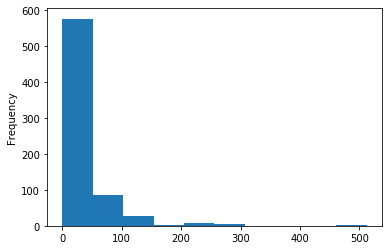

In [0]:
# Fare is a continuous variable so it can be displayed with a histogram
df['Fare'].plot(kind='hist');

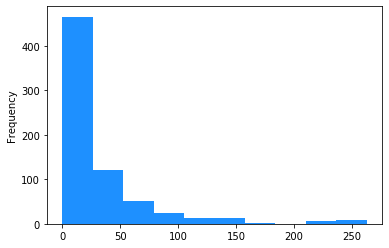

In [0]:
# Remove the extreme outliers
df = df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
# A continuous variable can be converted to categorical using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

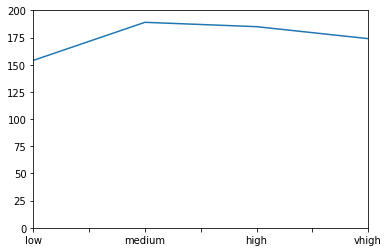

In [0]:
# Sometimes it's important to specify the range of your y-axis to ensure more accurate results
myresults.plot(ylim=(0,200));

Display single continuous variable

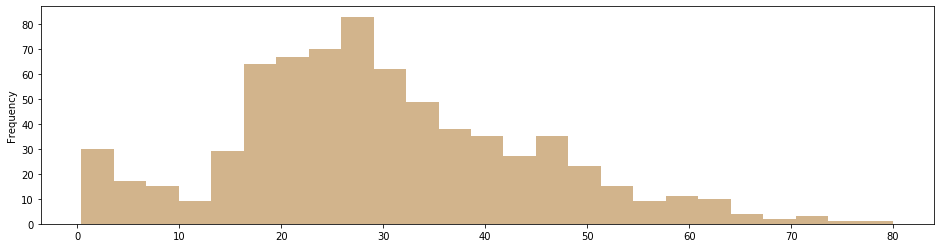

In [0]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

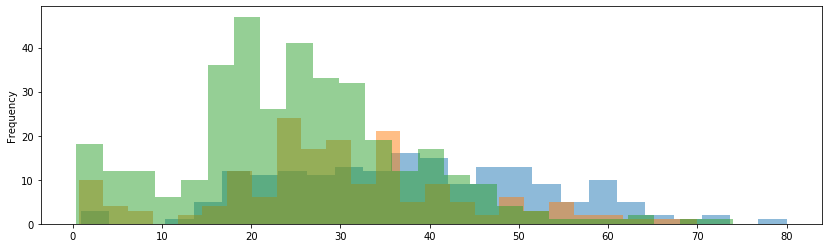

In [0]:
# Stacked histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);


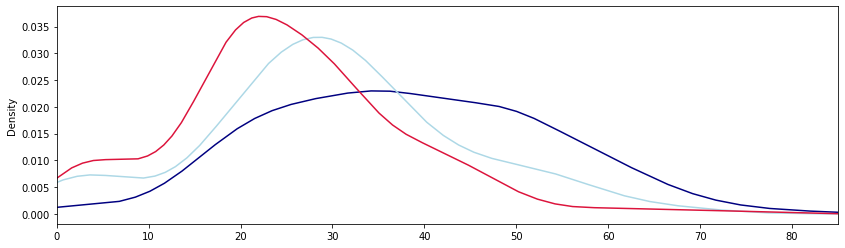

In [0]:
# This is easier read using a kernel density estimate (kde)
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

Display Single Categorical Variable

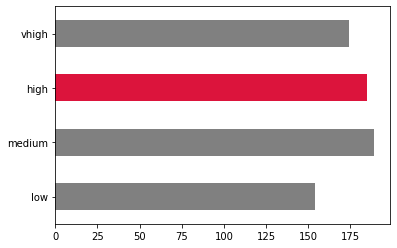

In [0]:
# Bar chart. Use colors to make a particular value pop!
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

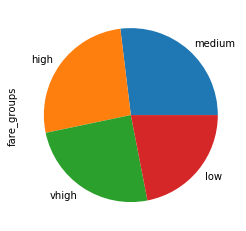

In [0]:
# Pie Chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

Compare two categorical variables

In [0]:
# Using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

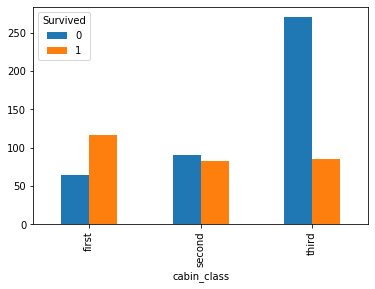

In [0]:
# Make that into a bar chart
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

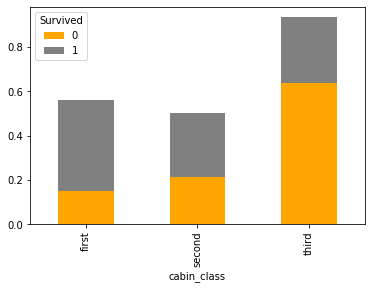

In [0]:
# Make a stacked bar chart 
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Crosstab with index percents
cab_survive2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')

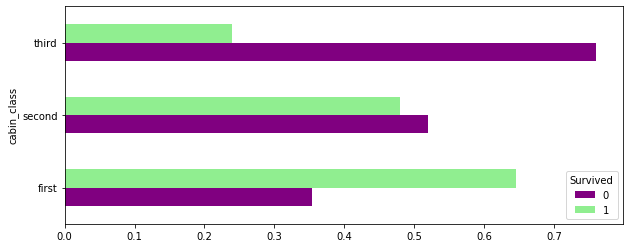

In [0]:
# A paired barchart 
cab_survive2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

Compare a categorical and a continuous

In [0]:
# Look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Explore that continuous variable broken out by a categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()

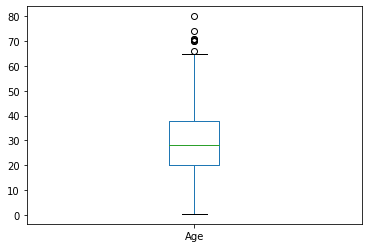

In [0]:
# Visualize single continuous
df['Age'].plot(kind='box');

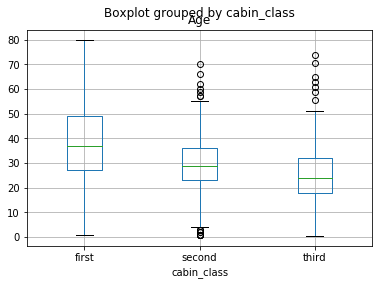

In [0]:
# But to break out a continuoys variable by a categorical, use .boxplot
df.boxplot(column='Age', by='cabin_class');

Compare Two or Three Continuous Variables

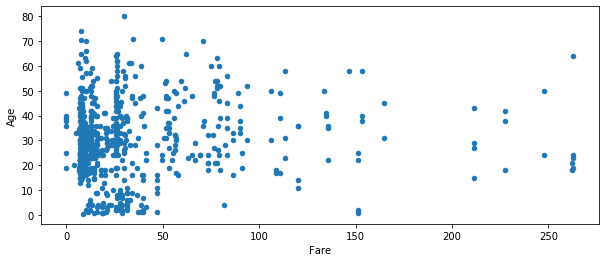

In [0]:
# Two continuous variables
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

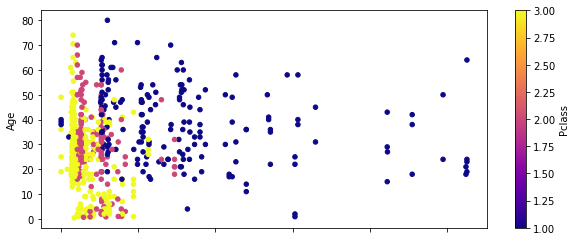

In [0]:
# Three variables
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4));

Use lineplot to examine two continuous variables

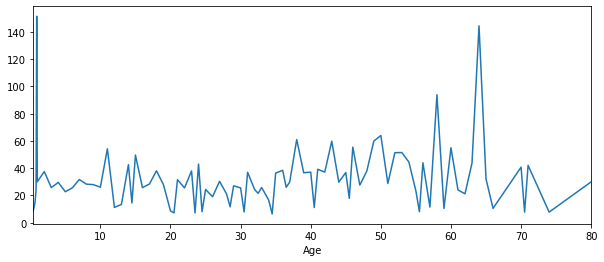

In [0]:
# line chart
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

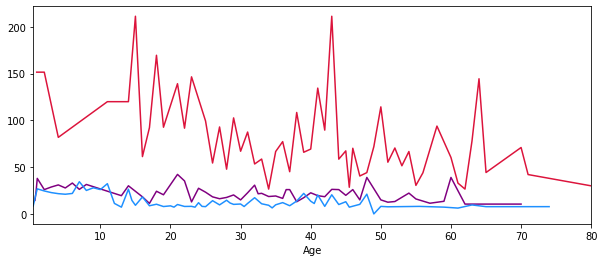

In [0]:
# Line chart
mycolors = ['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots 
# you can just loop through the values
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors[x-1]);

Compare multiple continuoys variables

In [0]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


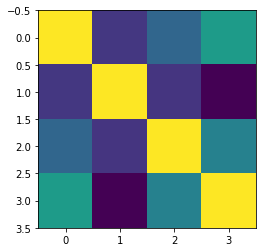

In [0]:
# Display correlation matrix as a heatmap
plt.imshow(corr_matrix);

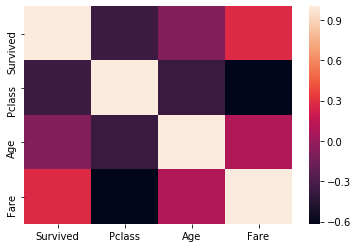

In [0]:
# This is better looking with seaborn code though
import seaborn as sns
sns.heatmap(corr_matrix);

Intro to Matplotlib

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

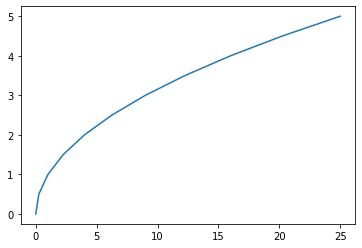

In [0]:
# Very simple plot to get started
plt.plot(y,x);

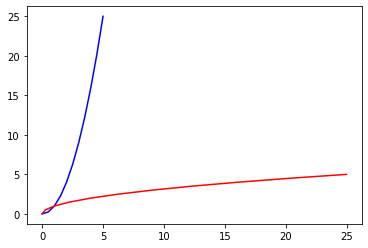

In [0]:
# You can have two plt plots together 
plt.plot(x, y, 'b')
plt.plot(y, x, 'r');

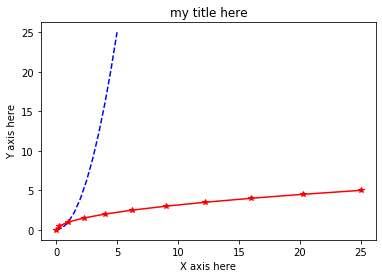

In [0]:
# Now add labels and some texture
plt.plot(x, y, 'b--')
plt.plot(y, x, 'r*-')
plt.xlabel('X axis here')
plt.ylabel('Y axis here')
plt.title('my title here');

Creating multiplots with the same canvas

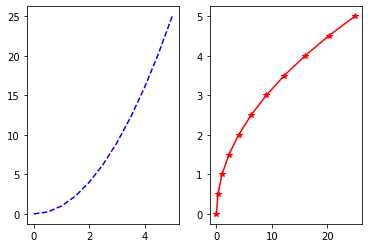

In [0]:
# Basic syntax: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')

plt.subplot(1,2,2)
plt.plot(y, x, 'r*-');

Matplotlib object oriented method

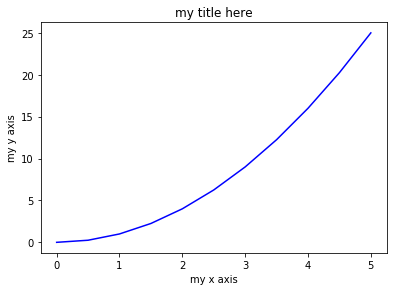

In [0]:
# Create figure (the empty canvas)
fig = plt.figure()
# Add set of axes to figure
# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');

We can easily add more than one axis to a figure

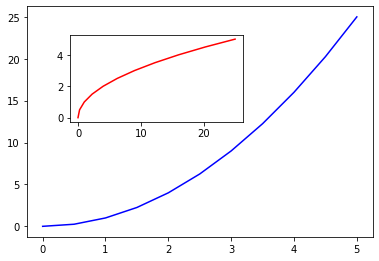

In [0]:
# Creates blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Larger figure axes 1
axes1.plot(x, y, 'b')
# Insert figure axes 2
axes2.plot(y, x, 'r');

subplots method

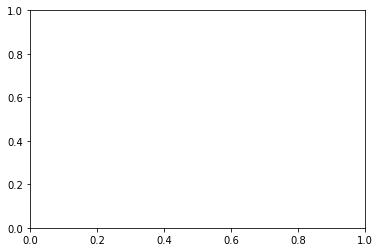

In [0]:
fig, ax = plt.subplots()

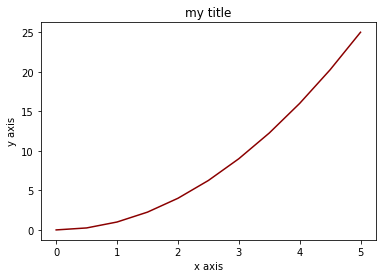

In [0]:
# Use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

# Default is (1,1)

# Use axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

Then you can specify number of rows and columns when creating the subplots() object

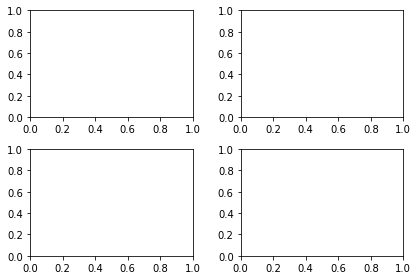

In [0]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
# parameter labels 'nrows' and 'ncols' are optional
plt.tight_layout()

In [0]:
# Axes is an array of axes to plot on 
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3ea7b8f60>,
      dtype=object)

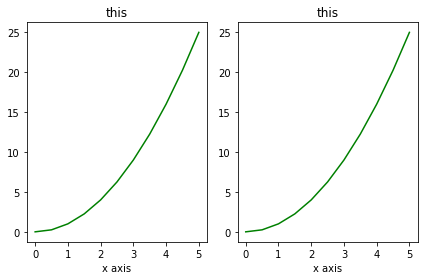

In [0]:
# We can iterate through this array
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('this');
plt.tight_layout();


Figure size, aspect ratio, and dpi

In [0]:
# Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created.
# dpi = dots per inch
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

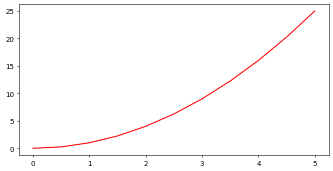

In [0]:
fig, axes = plt.subplots(figsize=(8,4), dpi=50)
axes.plot(x, y, 'r');

Saving Figures

In [0]:
fig.savefig('filename.png')

In [0]:
# We can also specify the dpi
fig.savefig('filename.png', dpi=200)

Legends, Labels and titles


In [0]:
ax.set_title('my title')

Text(0.5, 1, 'my title')

In [0]:
ax.set_xlabel('x label')

Text(0.5, 17.200000000000003, 'x label')

In [0]:
ax.set_ylabel('y label')

Text(213.8, 0.5, 'y label')

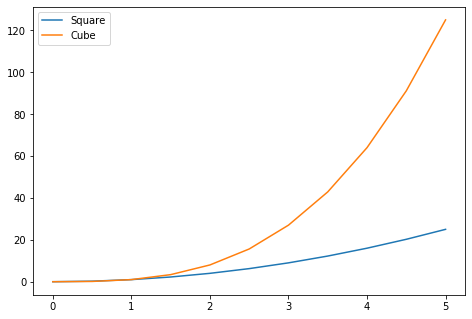

In [0]:
# Legends 
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend();

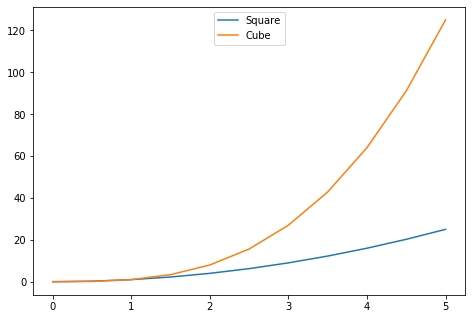

In [0]:
# legend takes optional keyword argument loc; this specifies 
# where to put the legend in the figure
ax.legend(loc=1)
ax.legend(loc=2)
ax.legend(loc=3)
ax.legend(loc=4)
ax.legend(loc=5)
ax.legend(loc=6)
ax.legend(loc=7)
ax.legend(loc=8)
ax.legend(loc=9)
fig

Colors with matlab like syntax

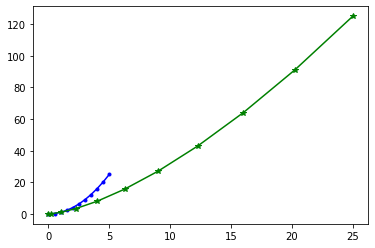

In [0]:
# Matlab style line color and style
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(y, x**3, 'g-*');

Colors with the color = parameter

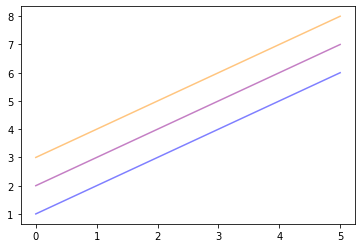

In [0]:
fig, ax = plt.subplots()
# half-transparant
ax.plot(x, x+1, color='blue', alpha=0.5)
# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)
# RGB hex code
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

Line and Marker Styles

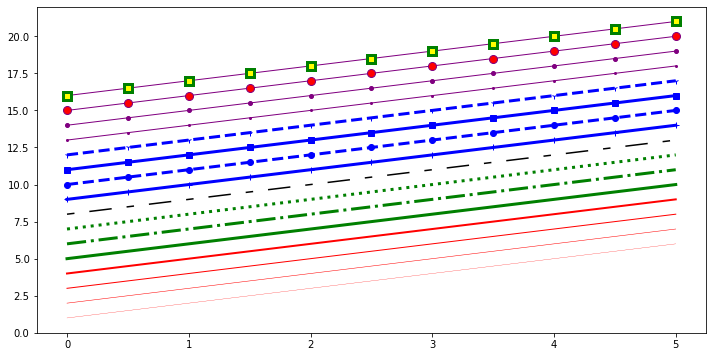

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

Plot Range

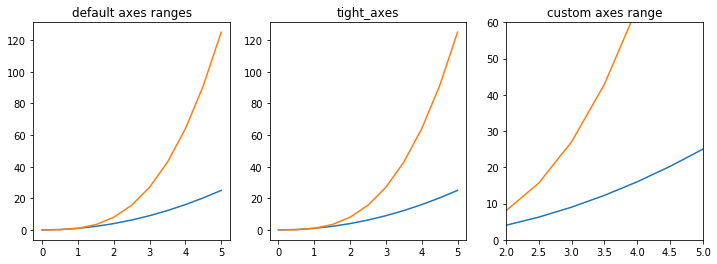

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight_axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0,60])
axes[2].set_xlim([2,5])
axes[2].set_title('custom axes range');

Imitate a Real World Example

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Make Fake Prototypes

In [0]:
# What styles are available in matplotlib? There's one for 538.
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [0]:
plt.style.use('fivethirtyeight')

In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

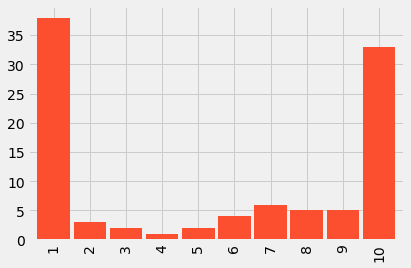

In [0]:
# replicate the figure post
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

In [0]:
fakelist2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
fake2 = pd.Series(fakelist2)

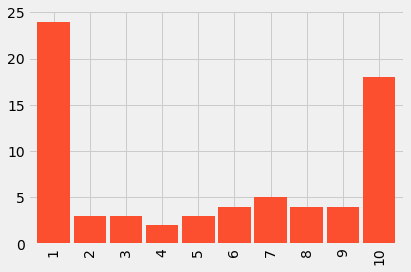

In [0]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

Annotate with Text

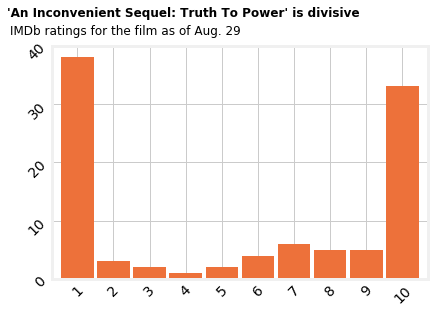

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

# Set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

# Set x and y axes labels
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,10));


In [0]:
display(example)

In [0]:
# Read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use timestamp as unique index identifier 
# so we can select rows by timestamp 
df.set_index('timestamp', inplace=True)

In [0]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [0]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# Grab only the percentage columns since we don't care about the raw
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Reset index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [0]:
display(example)

Generate the figure

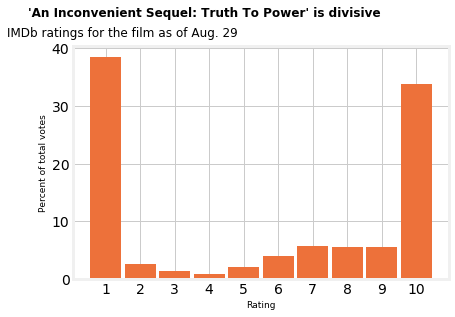

In [0]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

##2. Reproduce another example from FiveThityEight's shared data repository.

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv'
url2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv'

In [0]:
dc_df = pd.read_csv(url)
marvel_df = pd.read_csv(url2)

In [0]:
dc_df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [0]:
marvel_df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [0]:
print(dc_df.shape)
print(marvel_df.shape)

(6896, 13)
(16376, 13)


In [6]:
from IPython.display import display, Image

example_url3 = 'https://fivethirtyeight.com/wp-content/uploads/2014/10/hickey-feature-comics-3.png?w=1150'
example3 = Image(url=example_url3, width=400)

display(example3)

In [0]:
dc_df['YEAR'].dtype

dtype('float64')

In [0]:
dc_df['YEAR'].isnull().sum()

69

In [0]:
dc_df['YEAR'].shape

(6896,)

In [0]:
dc_df.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
# Let's pull only the columns that we will need
dc_df_cleaned = dc_df[['SEX', 'YEAR']]
dc_df_cleaned.head()

,SEX,YEAR
0,Male Characters,1939.0
1,Male Characters,1986.0
2,Male Characters,1959.0
3,Male Characters,1987.0
4,Male Characters,1940.0


In [8]:
# Let's take care of the null values
dc_df_cleaned.dropna(inplace=True)
dc_df_cleaned.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SEX     0
YEAR    0
dtype: int64

In [9]:
# Now do the same with the marvel dataframe
print(marvel_df.isnull().sum())
print(marvel_df.shape)

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64
(16376, 13)


In [10]:
# Select only columns we need
marvel_df_cleaned = marvel_df[['SEX', 'Year']]
marvel_df_cleaned.head()


,SEX,Year
0,Male Characters,1962.0
1,Male Characters,1941.0
2,Male Characters,1974.0
3,Male Characters,1963.0
4,Male Characters,1950.0


In [11]:
marvel_df_cleaned.dropna(inplace=True)
marvel_df_cleaned.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SEX     0
Year    0
dtype: int64

In [12]:
# Let's work on the example now
display(example3)

In [13]:
# Sort values by year
dc_df_cleaned = dc_df_cleaned.sort_values('YEAR')
dc_df_cleaned.head()

,SEX,YEAR
231,Male Characters,1935.0
6886,Male Characters,1936.0
705,Male Characters,1936.0
567,Male Characters,1936.0
1468,Male Characters,1936.0


In [14]:
dc_df_cleaned.tail()

,SEX,YEAR
3106,Female Characters,2012.0
6541,Male Characters,2012.0
5540,Male Characters,2012.0
2843,Female Characters,2012.0
5539,Male Characters,2013.0


In [0]:
# Map categorical strings in 'SEX' column to floats
dc_df_cleaned['SEX'] = dc_df_cleaned['SEX'].map({'Female Characters': 0, 'Male Characters': 1})

In [16]:
dc_df_cleaned.head()

,SEX,YEAR
231,1.0,1935.0
6886,1.0,1936.0
705,1.0,1936.0
567,1.0,1936.0
1468,1.0,1936.0


In [17]:
dc_df_cleaned['SEX'].value_counts()

1.0    4735
0.0    1947
Name: SEX, dtype: int64

In [0]:
# Convert floats to integers
dc_df_cleaned['YEAR'] = dc_df_cleaned['YEAR'].astype(int)

In [19]:
dc_df_cleaned.head()

,SEX,YEAR
231,1.0,1935
6886,1.0,1936
705,1.0,1936
567,1.0,1936
1468,1.0,1936


In [0]:
# Create lists for number of males per year and number of females per year
male_count = []
female_count = []

for year in range(1935, 2014, 1):
  temp_df = dc_df_cleaned[dc_df_cleaned['YEAR']==year]
  male_count.append(((temp_df['SEX']==1.0)==True).sum())
  female_count.append(((temp_df['SEX']==0.0)==True).sum())

In [0]:
# Create list of years from 1935 to 2013
year = []

for num in range(1935, 2014, 1):
  year.append(num)

In [0]:
# Create lists for percent of male superheroes introduced by year and percent of female superheroes introduced by year
male_percent = []
female_percent = []

for i in range(0, len(male_count)):
  male_percent.append(male_count[i]/(male_count[i]+female_count[i]))
  female_percent.append(female_count[i]/(male_count[i]+female_count[i]))

In [23]:
# Check length of our lists to ensure they are all equal
print(len(male_count))
print(len(female_count))
print(len(male_percent))
print(len(female_percent))
print(len(year))

79
79
79
79
79


In [0]:
# Create dictionary tying our lists to what we will want the column names to be
data = {'male-count':male_count, 'female-count':female_count, 
        'male-percent':male_percent, 'female-percent':female_percent, 'year':year}

In [25]:
# Create our new dataframe from the dictionary
dc_final = pd.DataFrame(data)
dc_final.head()

,male-count,female-count,male-percent,female-percent,year
0,1,0,1.000000,0.000000,1935
1,7,2,0.777778,0.222222,1936
2,3,1,0.750000,0.250000,1937
3,9,1,0.900000,0.100000,1938
4,13,5,0.722222,0.277778,1939


In [26]:
# Now let's do that for the marvel dataframe
# Sort values by year
marvel_df_cleaned = marvel_df_cleaned.sort_values('Year')
marvel_df_cleaned.head()

,SEX,Year
10495,Male Characters,1939.0
10492,Male Characters,1939.0
10491,Male Characters,1939.0
10490,Male Characters,1939.0
10489,Male Characters,1939.0


In [0]:
# Set categorical string values to numeric values
marvel_df_cleaned['SEX'] = marvel_df_cleaned['SEX'].map({'Female Characters': 0, 'Male Characters': 1})

In [28]:
marvel_df_cleaned['SEX'].value_counts()

1.0    11100
0.0     3628
Name: SEX, dtype: int64

In [0]:
# Convert floats to integers
marvel_df_cleaned['Year'] = marvel_df_cleaned['Year'].astype(int)

In [30]:
marvel_df_cleaned.head()
marvel_df_cleaned.tail()

,SEX,Year
15007,1.0,2013
15006,1.0,2013
15005,1.0,2013
15013,1.0,2013
16175,1.0,2013


In [0]:
# Create lists for number of males per year and number of females per year
marvel_male_count = []
marvel_female_count = []

for year in range(1939, 2014, 1):
  temp_df = marvel_df_cleaned[marvel_df_cleaned['Year']==year]
  marvel_male_count.append(((temp_df['SEX']==1.0)==True).sum())
  marvel_female_count.append(((temp_df['SEX']==0.0)==True).sum())

In [32]:
marvel_male_count

[56,
 183,
 180,
 220,
 178,
 121,
 85,
 78,
 58,
 99,
 53,
 26,
 43,
 20,
 26,
 57,
 38,
 13,
 7,
 1,
 4,
 36,
 71,
 86,
 149,
 144,
 132,
 107,
 102,
 111,
 92,
 108,
 93,
 140,
 181,
 180,
 209,
 238,
 214,
 146,
 149,
 187,
 156,
 152,
 122,
 143,
 171,
 168,
 129,
 215,
 237,
 243,
 232,
 318,
 401,
 344,
 210,
 192,
 194,
 190,
 147,
 221,
 148,
 214,
 170,
 168,
 211,
 259,
 209,
 244,
 199,
 200,
 235,
 140,
 97]

In [33]:
marvel_female_count

[10,
 33,
 15,
 14,
 13,
 12,
 12,
 12,
 13,
 14,
 6,
 3,
 9,
 5,
 10,
 19,
 4,
 1,
 0,
 1,
 0,
 2,
 5,
 13,
 25,
 23,
 21,
 19,
 10,
 18,
 17,
 17,
 16,
 34,
 50,
 50,
 66,
 57,
 54,
 32,
 61,
 60,
 58,
 52,
 65,
 61,
 69,
 66,
 45,
 81,
 71,
 92,
 92,
 118,
 125,
 117,
 79,
 101,
 91,
 76,
 72,
 87,
 73,
 85,
 84,
 108,
 112,
 105,
 82,
 101,
 85,
 110,
 99,
 56,
 54]

In [0]:
# Create list of years from 1939 to 2013
marvel_year = []

for num in range(1939, 2014, 1):
  marvel_year.append(num)

In [35]:
marvel_year

[1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [0]:
# Create lists for percent of male superheroes introduced by year and percent of female superheroes introduced by year
marvel_male_percent = []
marvel_female_percent = []

for i in range(0, len(marvel_male_count)):
  marvel_male_percent.append(marvel_male_count[i]/(marvel_male_count[i]+marvel_female_count[i]))
  marvel_female_percent.append(marvel_female_count[i]/(marvel_male_count[i]+marvel_female_count[i]))

In [37]:
marvel_male_percent

[0.8484848484848485,
 0.8472222222222222,
 0.9230769230769231,
 0.9401709401709402,
 0.9319371727748691,
 0.9097744360902256,
 0.8762886597938144,
 0.8666666666666667,
 0.8169014084507042,
 0.8761061946902655,
 0.8983050847457628,
 0.896551724137931,
 0.8269230769230769,
 0.8,
 0.7222222222222222,
 0.75,
 0.9047619047619048,
 0.9285714285714286,
 1.0,
 0.5,
 1.0,
 0.9473684210526315,
 0.9342105263157895,
 0.8686868686868687,
 0.8563218390804598,
 0.8622754491017964,
 0.8627450980392157,
 0.8492063492063492,
 0.9107142857142857,
 0.8604651162790697,
 0.8440366972477065,
 0.864,
 0.8532110091743119,
 0.8045977011494253,
 0.7835497835497836,
 0.782608695652174,
 0.76,
 0.8067796610169492,
 0.7985074626865671,
 0.8202247191011236,
 0.7095238095238096,
 0.757085020242915,
 0.7289719626168224,
 0.7450980392156863,
 0.6524064171122995,
 0.7009803921568627,
 0.7125,
 0.717948717948718,
 0.7413793103448276,
 0.7263513513513513,
 0.7694805194805194,
 0.7253731343283583,
 0.7160493827160493,
 0.7

In [38]:
marvel_female_percent

[0.15151515151515152,
 0.1527777777777778,
 0.07692307692307693,
 0.05982905982905983,
 0.06806282722513089,
 0.09022556390977443,
 0.12371134020618557,
 0.13333333333333333,
 0.18309859154929578,
 0.12389380530973451,
 0.1016949152542373,
 0.10344827586206896,
 0.17307692307692307,
 0.2,
 0.2777777777777778,
 0.25,
 0.09523809523809523,
 0.07142857142857142,
 0.0,
 0.5,
 0.0,
 0.05263157894736842,
 0.06578947368421052,
 0.13131313131313133,
 0.14367816091954022,
 0.1377245508982036,
 0.13725490196078433,
 0.15079365079365079,
 0.08928571428571429,
 0.13953488372093023,
 0.1559633027522936,
 0.136,
 0.14678899082568808,
 0.19540229885057472,
 0.21645021645021645,
 0.21739130434782608,
 0.24,
 0.19322033898305085,
 0.20149253731343283,
 0.1797752808988764,
 0.2904761904761905,
 0.242914979757085,
 0.27102803738317754,
 0.2549019607843137,
 0.34759358288770054,
 0.29901960784313725,
 0.2875,
 0.28205128205128205,
 0.25862068965517243,
 0.27364864864864863,
 0.2305194805194805,
 0.2746268

In [39]:
print(len(marvel_male_count))
print(len(marvel_female_count))
print(len(marvel_male_percent))
print(len(marvel_female_percent))
print(len(marvel_year))

75
75
75
75
75


In [0]:
# Create dictionary tying our lists to what we will want the column names to be
marvel_data = {'male-count':marvel_male_count, 'female-count':marvel_female_count, 
        'male-percent':marvel_male_percent, 'female-percent':marvel_female_percent, 'year':marvel_year}

In [41]:
# Now create a dataframe using our dictionary
marvel_final = pd.DataFrame(marvel_data)
marvel_final.head()

,male-count,female-count,male-percent,female-percent,year
0,56,10,0.848485,0.151515,1939
1,183,33,0.847222,0.152778,1940
2,180,15,0.923077,0.076923,1941
3,220,14,0.940171,0.059829,1942
4,178,13,0.931937,0.068063,1943


In [42]:
dc_final.head()

,male-count,female-count,male-percent,female-percent,year
0,1,0,1.000000,0.000000,1935
1,7,2,0.777778,0.222222,1936
2,3,1,0.750000,0.250000,1937
3,9,1,0.900000,0.100000,1938
4,13,5,0.722222,0.277778,1939


In [0]:
dc_final['male-percent'] = dc_final['male-percent'] * 100

In [0]:
dc_final['female-percent'] = dc_final['female-percent'] * 100

In [0]:
marvel_final['male-percent'] = marvel_final['male-percent'] * 100
marvel_final['female-percent'] = marvel_final['female-percent'] * 100

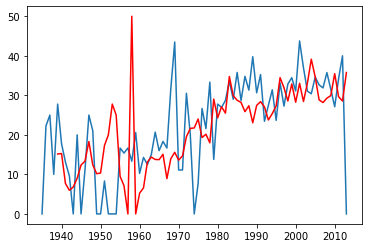

In [46]:
# Perfect! Now we can use this data to create our plots
plt.subplot(1,1,1)
plt.plot()
plt.plot(dc_final['year'], dc_final['female-percent'])
plt.plot(marvel_final['year'], marvel_final['female-percent'], color='red')
plt.show()


In [47]:
display(example3)

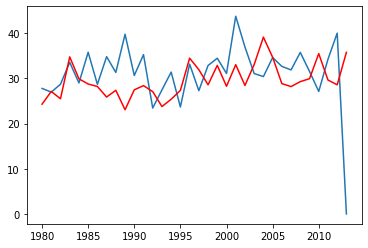

In [48]:
# It looks like they focused on the data between 1980 and 2013, so let's do that to ours as well
plot_data = dc_final[dc_final['year'] >= 1980]
marvel_plot_data = marvel_final[marvel_final['year'] >= 1980]

plt.subplot(1,1,1)
plt.plot()
plt.plot(plot_data['year'], plot_data['female-percent'])
plt.plot(marvel_plot_data['year'], marvel_plot_data['female-percent'], color='red')
plt.show()

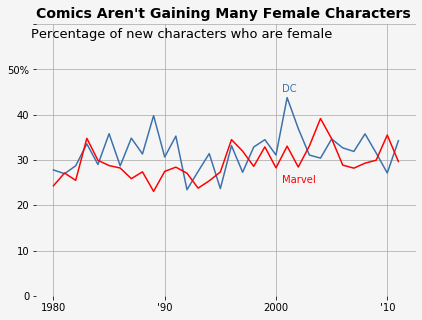

In [90]:
plot_data = dc_final[dc_final['year'] >= 1980]
marvel_plot_data = marvel_final[marvel_final['year'] >= 1980]

fig, ax = plt.subplots(figsize=(6.8, 5))

# Figure Background color
fig.patch.set(facecolor='whitesmoke')

# Set lines
ax.plot(plot_data['year'][:-2], plot_data['female-percent'][:-2], color='#3C71AB')
ax.plot(marvel_plot_data['year'][:-2], marvel_plot_data['female-percent'][:-2], color='red')

# Axes background color
ax.set(facecolor='whitesmoke')

# Set title and subtitle
ax.set_title("Comics Aren't Gaining Many Female Characters", fontweight='bold', loc='left', fontsize=14)
ax.text(x=1978, y=57, s='Percentage of new characters who are female', fontsize=13)

# Include labels for each line
ax.text(x=2000.5, y=45, s='DC', color='#3C71AB')
ax.text(x=2000.5, y=25, s='Marvel', color='red')

# Fix x and y tick marks and grid
ax.set_xticklabels(range(1980, 2020, 10))
ax.set_xticks(range(1980, 2020, 10))
ax.set_yticklabels(range(0, 60, 10))
ax.set_yticks(range(0, 60, 10));
ax.grid()

# Remove the borders around our graph
for spine in ax.spines:
  ax.spines[spine].set_visible(False)

# Customize ticks
ax.set_xticklabels(labels=("1980", "'90", "2000", "'10"))
ax.set_yticklabels(labels=('0', '10', '20', '30', '40', '50%'))
ax.set_xticks(range(1980, 2011, 10))
ax.set_yticks(range(0, 70, 10));

In [51]:
display(example3)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
import seaborn as sns